## Problem Set 1 
#### Canonical Stromgren Sphere Notebook
#### v1 02/08/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import pyCloudy as pc
# Define verbosity to high level (will print errors, warnings and messages)
pc.log_.level = 3


In [2]:
# The directory in which we will have the model
# You may want to change this to a different place so that the current directory
# will not receive all the Cloudy files.

# CHANGE the directory below if you wish
dir_ = 'test/'

#### Key Model Parameters

In [3]:
model_name = 'hw1_v1'   
full_model_name = '{0}{1}'.format(dir_, model_name)
dens = 3. #log cm-3, we'll assume uniform density
Teff = 40000.0 # Effective blackbody temperature of Central Star in K
qH = 48 # Rate of production of Hydrogen ionizing photons in log photons s^-1 
abundance_predef = 'hii region'  # Use pre-defined hii region abundances
metals = 1   # Metal scaling for abundances (for Problem 3)
r_min = 5e16 # cm Inner radius (use as default)
#r_max = 2e18 # cm  # Outer radius (if needed)
dist = 1.0 # kpc, only used for final output spectra


options = ('no molecules',
            'no level2 lines',
            'no fine opacities',
            'atom h-like levels small',
            'atom he-like levels small',
            'COSMIC RAY BACKGROUND',
            'element limit off -8',
            'print line optical depth'
            )

In [4]:
# Emission lines that we may be using for analysis of model outputs
emis_tab = ['H  1  4861.33A',
            'H  1  6562.81A',
            'Ca B  5875.64A',
            'N  2  6583.45A',
            'O  1  6300.30A',
            'O  2  3726.03A',
            'O  2  3728.81A',
            'S  2  6716.44A',
            'S  2  6730.82A',            
            'O  3  5006.84A',
            'BLND  4363.00A',
            'Cl 3  5517.71A',
            'Cl 3  5537.87A',
            'O  1  63.1679m',
            'O  1  145.495m',
            'C  2  157.636m']

#### Create the model input file (.in)

In [5]:
# Defining the object that will manage the input file for Cloudy
c_input = pc.CloudyInput(full_model_name)

In [6]:
# Filling the object with the parameters
# Defining the ionizing SED: Effective temperature and luminosity.
# The lumi_unit is one of the Cloudy options, like "luminosity solar", "q(H)", "ionization parameter", etc... 
c_input.set_BB(Teff = Teff, lumi_unit = 'q(H)', lumi_value = qH)

# Example, if you would like to use the ionization parameter U to set luminosity
# c_input.set_BB(Teff = Teff, lumi_unit = 'ionization parameter', lumi_value = logU)

# Defining the density and profile
c_input.set_cste_density(dens) # constant density

# Defining the inner radius. A second parameter could be the outer radius (matter-bounded nebula).
#c_input.set_radius(r_in=np.log10(r_min),r_out=np.log10(r_max))
c_input.set_radius(r_in=np.log10(r_min))

#c_input.set_abund(ab_dict = abund, nograins = True)
c_input.set_abund(predef=abundance_predef, nograins = True,metals=metals)  # Use pre-defined hii region abundances

# Other options from above
c_input.set_other(options)

c_input.set_iterate(10) # (0) for no iteration, () for one iteration, (N) for N iterations.
c_input.set_sphere() # () or (True) : sphere, or (False): open geometry.
c_input.set_emis_tab(emis_tab) # better use read_emis_file(file) for long list of lines, where file is an external file.
c_input.set_distance(dist=dist, unit='kpc', linear=True) # unit can be 'kpc', 'Mpc', 'parsecs', 'cm'. If linear=False, the distance is in log.

In [9]:
cd Final\ Project

/Users/messeremichael/Documents/GradSchool/ISM/Final Project


In [10]:
# Writing the Cloudy inputs. to_file for writing to a file (amed by full_model_name). verbose ton print on the screen.
c_input.print_input(to_file = True, verbose = False)



     CloudyInput: Input writen in test/hw1_v1.in


## Run Cloudy.exe

In [11]:
# CHANGE THIS DIRECTORY BELOW
pc.config.cloudy_exe = '/Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe'

# Printing some message to the screen
pc.log_.message('Running {0}'.format(model_name), calling = 'test1')

# Running Cloudy with a timer. Here we reset it to 0.
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')
c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     _Config: cloudy_exe set to /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe
     test1: Running hw1_v1
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p hw1_v1
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p hw1_v1
   test1: Cloudy ended after seconds: in 67.04789304733276


## Cloudy Outputs

In [9]:
# Reading the Cloudy outputs in the Mod CloudyModel object
Mod = pc.CloudyModel(full_model_name)

     CloudyModel tmp/hw1/hw1_v1: Creating CloudyModel for tmp/hw1/hw1_v1
     CloudyModel tmp/hw1/hw1_v1: Li abundance not defined
     CloudyModel tmp/hw1/hw1_v1: Be abundance not defined
     CloudyModel tmp/hw1/hw1_v1: B abundance not defined
     CloudyModel tmp/hw1/hw1_v1: F abundance not defined
     CloudyModel tmp/hw1/hw1_v1: Sc abundance not defined
     CloudyModel tmp/hw1/hw1_v1: Ti abundance not defined
     CloudyModel tmp/hw1/hw1_v1: V abundance not defined
     CloudyModel tmp/hw1/hw1_v1: Co abundance not defined
     CloudyModel tmp/hw1/hw1_v1: Cu abundance not defined
     CloudyModel tmp/hw1/hw1_v1: tmp/hw1/hw1_v1.rad read
     CloudyModel tmp/hw1/hw1_v1: Number of zones: 186
     CloudyModel tmp/hw1/hw1_v1: tmp/hw1/hw1_v1.phy read
     CloudyModel tmp/hw1/hw1_v1: tmp/hw1/hw1_v1.ele_H read
     CloudyModel tmp/hw1/hw1_v1: filling H with 3 columns
     CloudyModel tmp/hw1/hw1_v1: tmp/hw1/hw1_v1.ele_He read
     CloudyModel tmp/hw1/hw1_v1: filling He with 3 columns
    

In [10]:
# Table of line labels, volume emissivities, and relative volume emissivities (Hbeta = 100)
print("Label         vol. emis.  rel. emis.")
for line in Mod.emis_labels:
    print('{0} {1:10.3e} {2:7.2f}'.format(line, Mod.get_emis_vol(line), Mod.get_emis_vol(line) / Mod.get_emis_vol('H__1_486133A') * 100.))

Label         vol. emis.  rel. emis.
H__1_486133A  4.724e+35  100.00
H__1_656281A  1.291e+36  273.28
CA_B_587564A  5.543e+34   11.74
N__2_658345A  3.670e+35   77.69
O__1_630030A  5.779e+33    1.22
O__2_372603A  5.094e+35  107.84
O__2_372881A  4.160e+35   88.08
S__2_671644A  6.712e+34   14.21
S__2_673082A  8.274e+34   17.52
O__3_500684A  1.001e+36  211.89
BLND_436300A  5.784e+21    0.00
CL_3_551771A  1.376e+33    0.29
CL_3_553787A  1.225e+33    0.26
O__1_631679M  2.315e+33    0.49
O__1_145495M  1.880e+32    0.04
C__2_157636M  5.543e+33    1.17


In [11]:
# This provides a useful overview of the model, radii, mass, ion fractions, temperatures, densities and log U
Mod.print_stats()

 Name of the model: tmp/hw1/hw1_v1
 R_in (cut) = 5.000e+16 (5.000e+16), R_out (cut) = 8.933e+17 (8.933e+17)
 H+ mass = 2.46e+00, H mass = 2.51e+00 N zones: 186
 <H+/H> = 0.99, <He++/He> = 0.00, <He+/He> = 0.83
 <O+++/O> = 0.00, <O++/O> = 0.49, <O+/O> = 0.50
 <N+++/N> = 0.00, <N++/N> = 0.62, <N+/N> = 0.38
 T(O+++) = 7792, T(O++) = 7669, T(O+) = 8325
 <ne> = 1059,  <nH> = 1000, T0 = 8008, t2=0.0049
 <log U> = -2.03


## Cloudy Plots

In [12]:
# Plot ionization fractions (for Problem 1, and useful for 2 and 3)
plt.figure(figsize=(8,8))
plt.plot(Mod.radius, Mod.get_ionic('H', 1), label = 'HII')
plt.plot(Mod.radius, Mod.get_ionic('H', 0), label = 'HI')
plt.plot(Mod.radius, Mod.get_ionic('He', 0), label = 'HeI')
plt.plot(Mod.radius, Mod.get_ionic('He', 1), label = 'HeII')
plt.plot(Mod.radius, Mod.get_ionic('He', 2), label = 'HeIII')
plt.xlabel('Radius',fontsize=14)
plt.ylabel(r'$x_{ion}$',fontsize=14)
plt.title('Ionization Zones',fontsize=18)
plt.legend(loc=3,fontsize=12)


NameError: name 'Mod' is not defined

<Figure size 576x576 with 0 Axes>

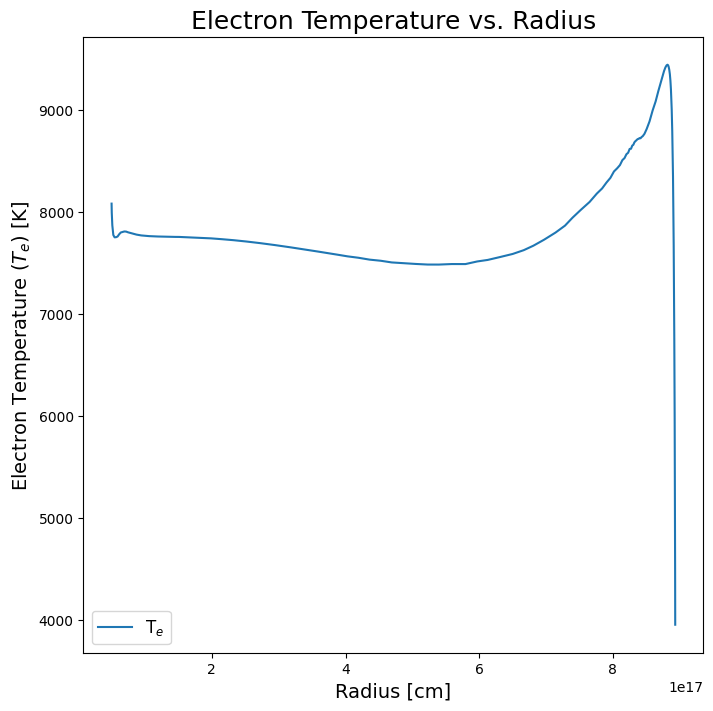

In [13]:
# Electron Temperature vs. radius (useful for Problem 3)
plt.figure(figsize=(8,8))
plt.plot(Mod.radius, Mod.te, label = r'T$_e$')
plt.title('Electron Temperature vs. Radius',fontsize=18)
plt.xlabel('Radius [cm]',fontsize=14)
plt.ylabel(r'Electron Temperature ($T_e$) [K]',fontsize=14)
plt.legend(loc=3,fontsize=12)

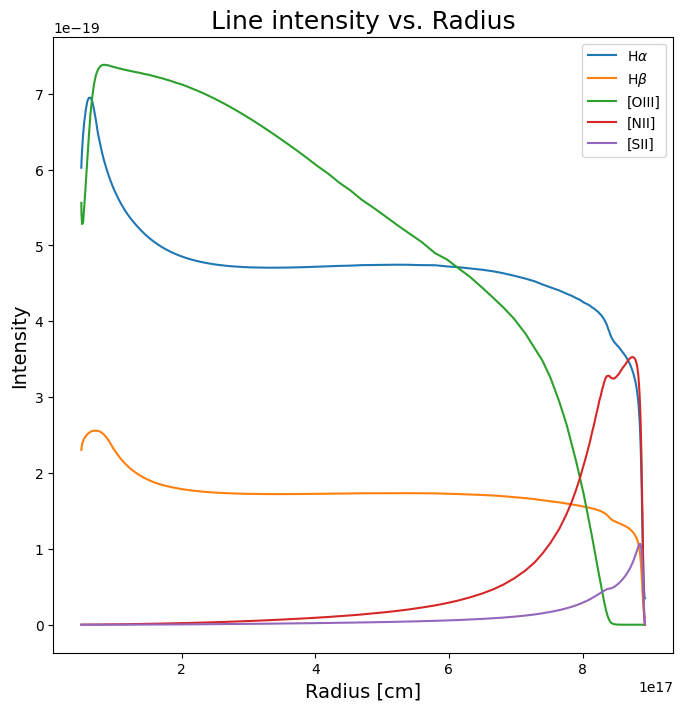

In [14]:
# This plot, along with the emissivity table, shows which lines dominate for 
# different models, and where, useful for Problem 3. 
#

plt.figure(figsize=(8,8))
plt.plot(Mod.radius, Mod.get_emis('H__1_656281A'), label = r'H$\alpha$')
plt.plot(Mod.radius, Mod.get_emis('H__1_486133A'), label = r'H$\beta$')
plt.plot(Mod.radius, Mod.get_emis('O__3_500684A'), label = '[OIII]')
plt.plot(Mod.radius, Mod.get_emis('N__2_658345A'), label = '[NII]')
plt.plot(Mod.radius, Mod.get_emis('S__2_671644A'), label = '[SII]')
plt.title('Line intensity vs. Radius',fontsize=18)
plt.xlabel('Radius [cm]',fontsize=14)
plt.ylabel(r'Intensity',fontsize=14)

plt.legend()

Text(0, 0.5, 'T$_e$ [K]')

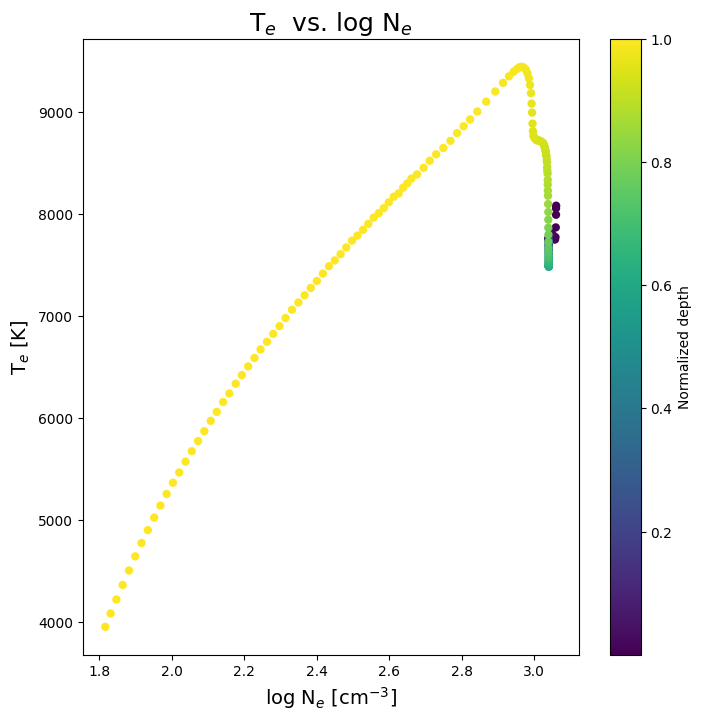

In [15]:
# This isn't requested in the problem set but can be useful for seeing the range of temperatures and
# electron densities vs. radius in your model

plt.figure(figsize=(8,8))
plt.scatter(np.log10(Mod.ne),Mod.te,  c = Mod.depth/np.max(Mod.depth), edgecolors = 'none')
plt.colorbar(label='Normalized depth')

plt.title(r'T$_e$ '+' vs. '+r'log N$_e$',fontsize=18 )
plt.xlabel(r'log N$_e$ [cm$^{-3}$]',fontsize=14)
plt.ylabel(r'T$_e$ [K]',fontsize=14)


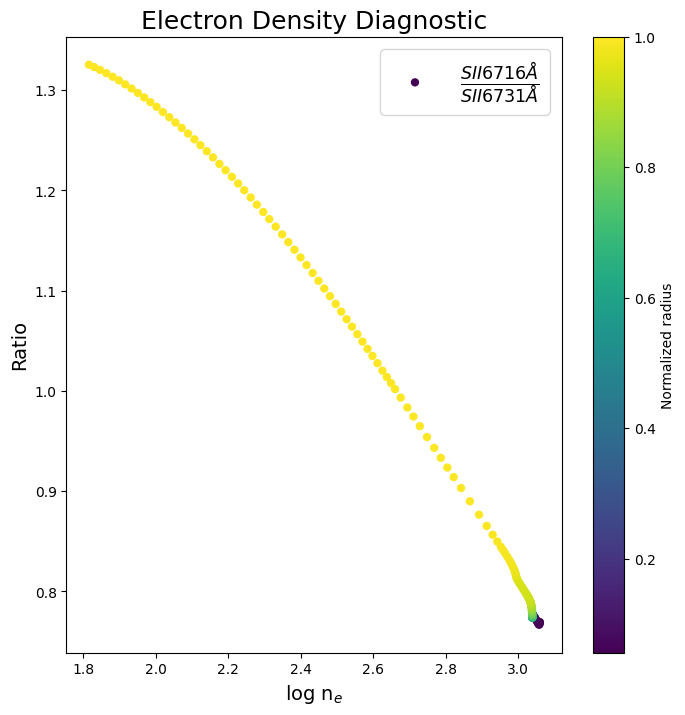

In [16]:
# This is an example plot of a density diagnostic line ratio, using the fact that a single Stromgren sphere
# has a range of electron densities

# Ideally for Problem 2 you should calculate models covering a range of densities

plt.figure(figsize=(8,8))
plt.scatter(np.log10(Mod.ne),( Mod.get_emis('S__2_671644A')/Mod.get_emis('S__2_673082A')), c = Mod.radius/np.max(Mod.radius), edgecolors = 'none',label=r'$\frac{SII6716\AA}{SII6731\AA}$')
plt.colorbar(label='Normalized radius')
plt.xlabel(r'log n$_e$',fontsize=14)
plt.ylabel('Ratio',fontsize=14)
plt.title('Electron Density Diagnostic',fontsize=18)
plt.legend(fontsize=18)


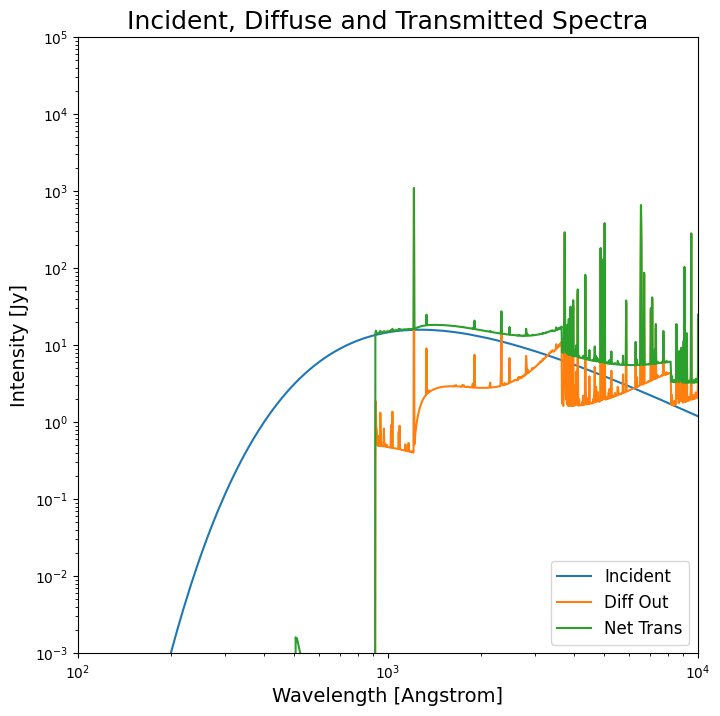

In [17]:
plt.figure(figsize=(8,8))
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'incid', unit = 'Jy'), label = 'Incident')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'diffout', unit = 'Jy'), label = 'Diff Out')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'ntrans', unit = 'Jy'), label = 'Net Trans')
plt.xlim((100, 10000))
plt.ylim((1e-3, 1e5))
plt.title('Incident, Diffuse and Transmitted Spectra',fontsize=18)
plt.xlabel('Wavelength [Angstrom]',fontsize=14)
plt.ylabel('Intensity [Jy]', fontsize=14)
plt.legend(loc=4,fontsize=12)


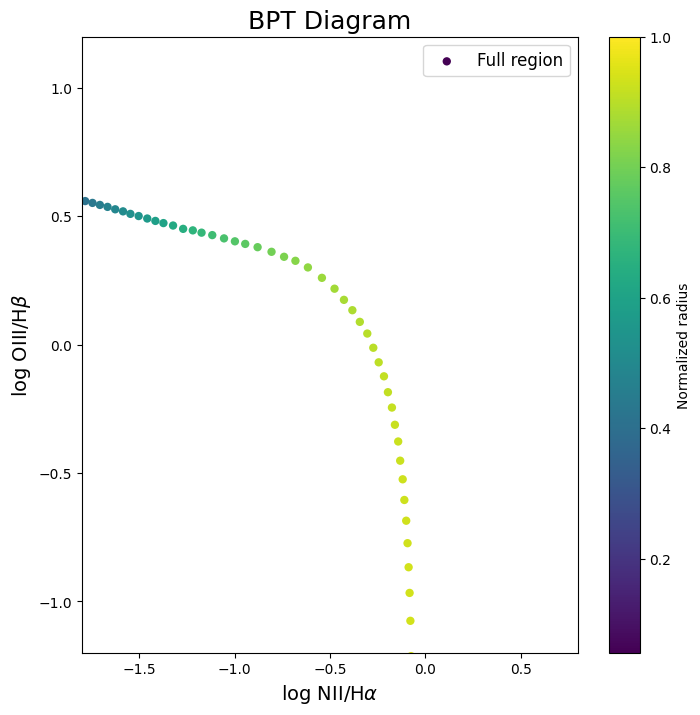

In [18]:
# BPT Diagram, Useful for Problem 4

plt.figure(figsize=(8,8))
plt.scatter(np.log10( Mod.get_emis('N__2_658345A')/Mod.get_emis('H__1_656281A')),np.log10(Mod.get_emis('O__3_500684A')/Mod.get_emis('H__1_486133A')), c = Mod.radius/np.max(Mod.radius), edgecolors = 'none',label='Full region')
plt.xlim((-1.8, 0.8))
plt.ylim((-1.2, 1.2))
plt.colorbar(label='Normalized radius')
plt.title(r'BPT Diagram',fontsize=18)
plt.xlabel(r'log NII/H$\alpha$',fontsize=14)
plt.ylabel(r'log OIII/H$\beta$',fontsize=14)
plt.legend(fontsize=12)


